In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
data = pd.read_csv("car data.csv")
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

In [5]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
# check in case of any duplicate records and then drop it
print(data.duplicated().sum())
data.drop_duplicates(inplace=True)

2


There were 2 duplicate records which are now removed from the dataset

In [7]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<AxesSubplot:>

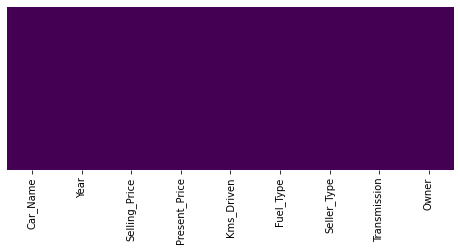

In [8]:
# check for any missing value
plt.figure(figsize=(8,3))
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [9]:
# categorising columns based on column type
Nominal_cat_var =['Car_Name','Fuel_Type','Seller_Type','Transmission']
Ordinal_cat_var = ['Owner']
Num_var = ['Selling_Price','Present_Price','Kms_Driven']
Date_colum = ['Year']

### Data Exploration


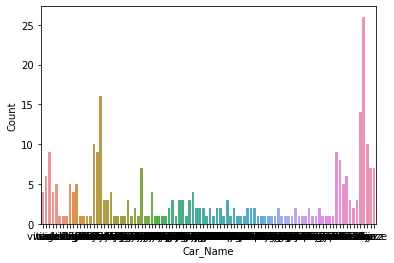

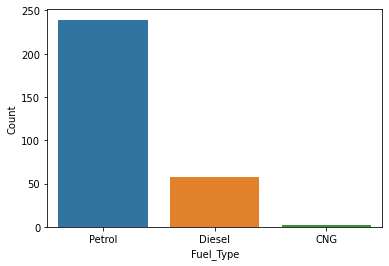

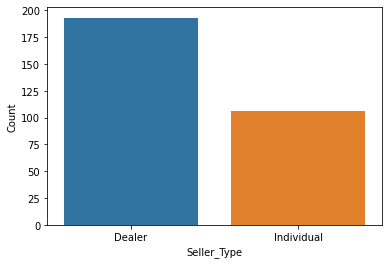

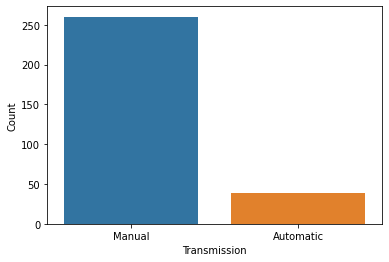

In [10]:
# Distribution of all the categorical variables
for column in Nominal_cat_var :
    sns.countplot(data[column])
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

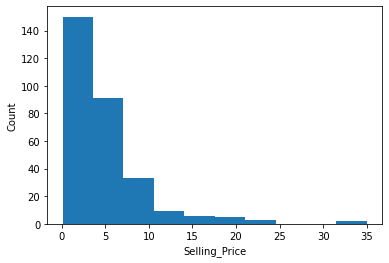

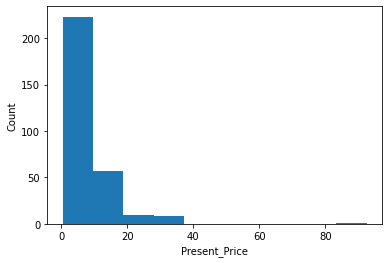

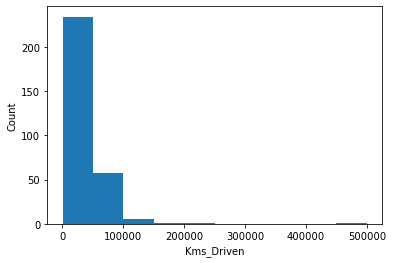

In [11]:
# Distribution of all the numerical variables
for column in Num_var :
    plt.hist(data[column])
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

All the numerical variables are right skewed

<AxesSubplot:xlabel='Year', ylabel='count'>

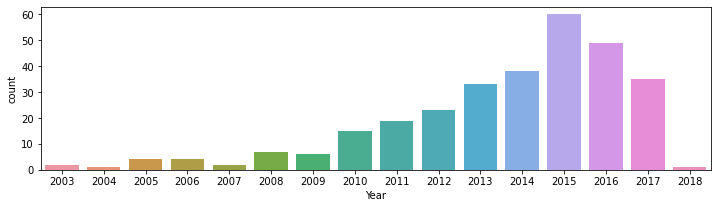

In [12]:
# Analysing date column
plt.figure(figsize=(12,3))
sns.countplot(data.Year)

### Feature Engineering

- Drop the column car name, as it has no significant use.
- Convert the columns - "Fuel_Type", "Seller_Type", "Transmission" using One hot encoding
- Create a new "No_of_year" columns to calculate No. of Years and drop the Years column

In [13]:
data.drop(['Car_Name'], axis=1, inplace=True)
data

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [14]:
# One hot encoding
Nominal =['Fuel_Type','Seller_Type','Transmission']
data = pd.get_dummies(data,columns=Nominal,drop_first=True)
data

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,1,0,0,1
297,2015,4.00,5.90,60000,0,0,1,0,1
298,2009,3.35,11.00,87934,0,0,1,0,1
299,2017,11.50,12.50,9000,0,1,0,0,1


In [15]:
# Creating new year column and drop Years column
data['No_of_year'] = 2020 - data['Year'] 
data.drop(['Year'], axis=1, inplace=True)
data

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,No_of_year
0,3.35,5.59,27000,0,0,1,0,1,6
1,4.75,9.54,43000,0,1,0,0,1,7
2,7.25,9.85,6900,0,0,1,0,1,3
3,2.85,4.15,5200,0,0,1,0,1,9
4,4.60,6.87,42450,0,1,0,0,1,6
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,1,0,0,1,4
297,4.00,5.90,60000,0,0,1,0,1,5
298,3.35,11.00,87934,0,0,1,0,1,11
299,11.50,12.50,9000,0,1,0,0,1,3


In [16]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,No_of_year
0,3.35,5.59,27000,0,0,1,0,1,6
1,4.75,9.54,43000,0,1,0,0,1,7
2,7.25,9.85,6900,0,0,1,0,1,3
3,2.85,4.15,5200,0,0,1,0,1,9
4,4.60,6.87,42450,0,1,0,0,1,6


<AxesSubplot:>

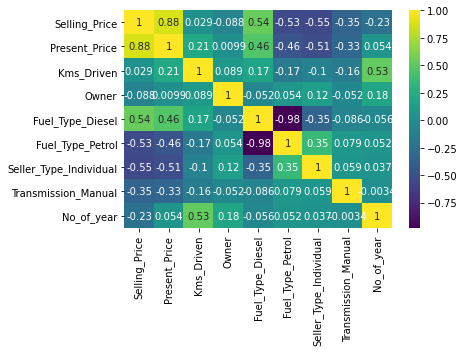

In [17]:
# Checking the corelation between the variables
sns.heatmap(data.corr(),annot=True,cmap='viridis')

In [18]:
# Splitting data into dependent and independent variables
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [19]:
X

,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,No_of_year
0,5.59,27000,0,0,1,0,1,6
1,9.54,43000,0,1,0,0,1,7
2,9.85,6900,0,0,1,0,1,3
3,4.15,5200,0,0,1,0,1,9
4,6.87,42450,0,1,0,0,1,6
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,1,0,0,1,4
297,5.90,60000,0,0,1,0,1,5
298,11.00,87934,0,0,1,0,1,11
299,12.50,9000,0,1,0,0,1,3


In [20]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [22]:
X_train

,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,No_of_year
163,0.95,27000,0,0,1,1,1,10
262,5.80,40023,0,0,1,0,1,5
220,4.43,38488,0,0,1,0,1,3
125,1.75,40000,0,0,1,1,1,11
40,7.87,24524,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...
205,5.70,3493,1,0,1,0,1,4
257,13.60,40324,0,0,1,0,1,5
73,5.71,43000,0,0,1,0,1,9
237,13.60,68000,0,1,0,0,1,5


In [23]:
X_test

,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,No_of_year
175,0.787,75000,0,0,1,1,1,9
289,13.600,10980,0,0,1,0,1,4
52,19.770,15000,0,1,0,0,0,3
148,0.940,45000,0,0,1,1,1,10
216,4.430,12500,0,0,1,0,1,4
199,0.580,53000,0,0,1,1,1,13
276,13.600,24800,0,0,1,0,1,5
63,35.960,47000,0,1,0,0,0,5
28,3.950,44542,0,0,1,0,1,10
203,4.600,53460,0,0,1,0,1,9


In [24]:
y_train

163     0.45
262     4.00
220     3.50
125     0.90
40      5.85
       ...  
205     5.25
257     8.50
73      2.65
237    11.25
38      3.00
Name: Selling_Price, Length: 239, dtype: float64

In [25]:
y_test

175     0.38
289    10.11
52     18.00
148     0.52
216     2.90
199     0.12
276     8.65
63     23.50
28      1.95
203     2.95
114     1.15
121     1.05
11      6.85
246     3.75
112     1.15
297     4.00
74      4.90
107     1.25
267     8.35
109     1.20
190     0.20
12      7.50
71      4.50
19      2.65
89      4.75
110     1.20
300     5.30
178     0.35
122     1.05
252     5.40
86     35.00
298     3.35
134     0.65
287     5.75
133     0.72
79     14.50
255     3.00
140     0.60
91     11.25
191     0.20
4       4.60
195     0.18
156     0.48
249     5.25
81      4.75
16      7.25
170     0.40
129     0.78
59     19.99
187     0.25
281     2.10
213     2.90
176     0.35
60      6.95
152     0.50
214     5.25
193     0.20
285     7.40
174     0.38
141     0.60
Name: Selling_Price, dtype: float64

### Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = lr.predict(X_test)
y_pred

array([-8.82443400e-01,  8.84467711e+00,  1.46540728e+01, -1.03979470e+00,
        3.98298018e+00, -2.53231323e+00,  8.34385906e+00,  2.21937617e+01,
        1.02884763e+00,  1.73742233e+00,  1.49855359e+00, -9.71867882e-02,
        8.10595189e+00,  3.42494291e+00,  1.63256684e+00,  4.05829972e+00,
        6.72891454e+00,  6.90350211e-01,  8.19447911e+00,  2.37055610e+00,
       -2.06625579e+00,  6.99315577e+00,  7.58105566e+00,  3.18001822e+00,
        4.21517490e+00,  2.14652470e+00,  4.80302540e+00,  1.09321399e+00,
        1.82372418e+00,  5.24370518e+00,  4.93633368e+01,  4.08160698e+00,
        2.01650415e+00,  5.52823031e+00,  1.74025186e+00,  1.78569533e+01,
        2.55105014e+00,  4.29758011e-01,  1.06661636e+01, -1.22397566e+00,
        5.88171452e+00,  7.82166925e-01,  1.84387213e+00,  5.63352745e+00,
        6.83301858e+00,  8.37875925e+00, -2.53216644e-02,  2.07311472e+00,
        2.18116746e+01,  6.46229964e-02,  1.25281187e+00,  3.02725664e+00,
       -4.73697981e-01,  

In [28]:
#Accuracy
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8708986500692841

### Decision Tree Regression

In [29]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 1)
dtr.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred_dtr)

0.9758297391964037

### Random Forest Regression

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred_rf)

0.8747527284359629

- R2 score for Multiple Linear Regression - 0.8708986500692841
- Decision Tree Regression R2 Score - 0.9758297391964037
- Random Forest Regression R2 Score - 0.8747527284359629

So the best model is Decision Tree Regressor, having high accuracy